<h1>Linear regression: Training and Validation Data</h1> 

In [1]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

In [2]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [3]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

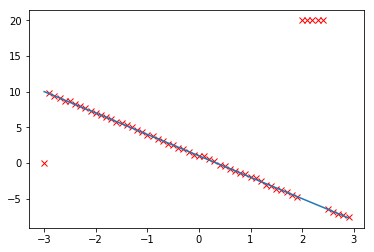

In [4]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr')
plt.plot(train_data.x.numpy(), train_data.f.numpy())
plt.show()

<h2 id="LR_Loader_Cost">Create a Linear Regression Object,  Data Loader, and Criterion Function</h2>

In [5]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [6]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<h2 id="LR_Hyper">Different learning rates and Data Structures to Store results for different Hyperparameters</h2>

In [8]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

<h2 id="Model">Train different models  for different Hyperparameters</h2>

In [10]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates 
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

<h2 id="Result">View the Results</h2>

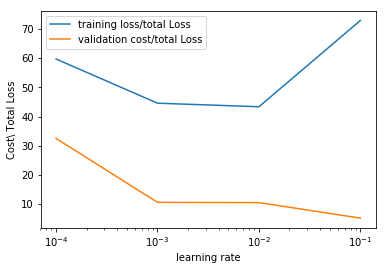

In [12]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i [[-0.69592774]
 [-0.6749512 ]
 [-0.65397453]]
i [[5.4016857]
 [5.283781 ]
 [5.1658764]]
i [[6.6302624]
 [6.4955664]
 [6.36087  ]]
i [[14.280725]
 [13.852646]
 [13.424566]]


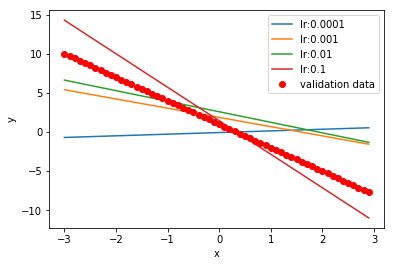

In [13]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Practice: Use the train loader to get the data samples x and y. Produce yhat. Compare y and yhat.

good_model = MODELS[2]
for x, y in trainloader:
    print("yhat= ", good_model(x),"y", y)